In [1]:
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from sklearn.utils import shuffle

train_dir = 'C:/Users/Nithin R/Downloads/Dataset-3/train'
#test_dir = '/content/drive/MyDrive/GecDiaDiseases/Testing'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    label_dir = os.path.join(train_dir, label)  # Construct full label directory path
    for image in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image)  # Construct full image path
        if os.path.isfile(image_path):  # Check if it's a file before appending
            train_paths.append(image_path)
            train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

(([<matplotlib.patches.Wedge at 0x2074ab31e80>,
  [Text(0.4276709787089529, 1.04053953983985, 'Mild'),
   Text(-0.8981187099737034, 0.6775011312132041, 'Moderate'),
   Text(-0.8830618286152624, -0.6970127738016494, 'No_DR'),
   Text(0.45036244770332035, -1.030921270368729, 'Proliferate_DR'),
   Text(1.1249325081220227, 0.012322831261336268, 'Severe')],
  [Text(0.23759498817164043, 0.5780775221332499, '20.9%'),
   Text(-0.4989548388742796, 0.3763895173406689, '20.9%'),
   Text(-0.4905899047862568, -0.38722931877869404, '20.9%'),
   Text(0.25020135983517794, -0.5727340390937383, '20.9%'),
   Text(0.6249625045122349, 0.006846017367409037, '16.3%')]),)

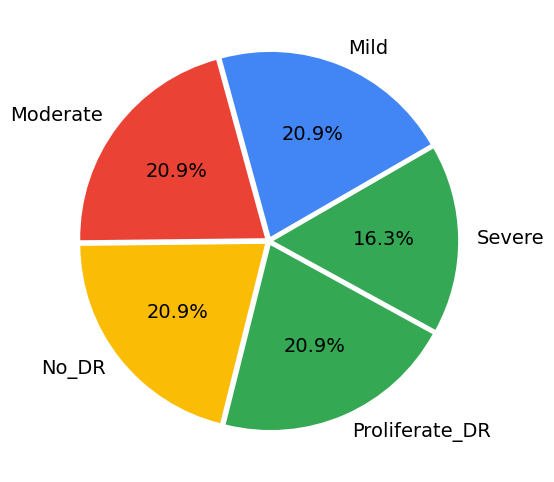

In [3]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05','#34a853','#34a855']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='Mild']),
         len([x for x in train_labels if x=='Moderate']),
         len([x for x in train_labels if x=='No_DR']),
         len([x for x in train_labels if x=='Proliferate_DR']),
         len([x for x in train_labels if x=='Severe'])],
        labels=['Mild','Moderate', 'No_DR','Proliferate_DR','Severe'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025,0.025),
        startangle=30),

In [ ]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    label_dir = os.path.join(test_dir, label)  # Construct full label directory path
    for image in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image)  # Construct full image path
        test_paths.append(image_path)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)


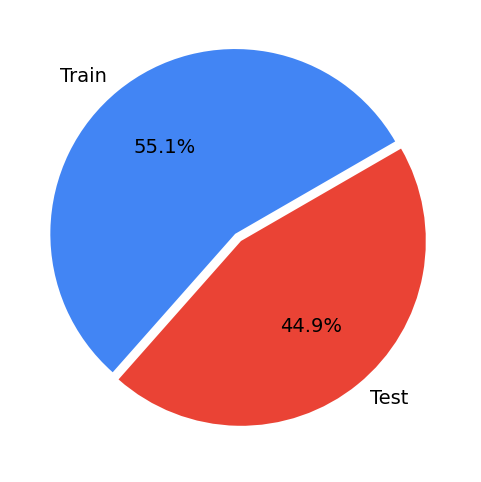

In [ ]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

Original Image Shape: (224, 224, 3)
Grayscale Image Shape: (224, 224)


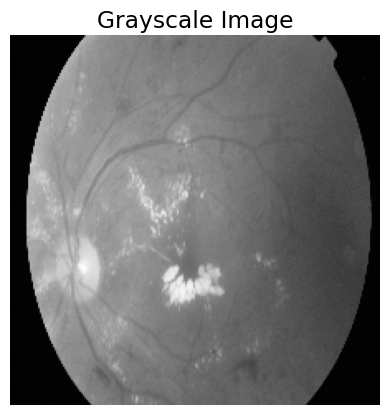

In [ ]:
# Grayscale conversion function
def convert_to_grayscale(image_path):
    img = Image.open(image_path).convert('L')  # 'L' mode for grayscale
    return np.array(img)

# Example of how to use the grayscale conversion function
image_path = train_paths[0]
grayscale_image = convert_to_grayscale(image_path)

# Print the shape of the grayscale image array
print(f"Original Image Shape: {np.array(Image.open(image_path)).shape}")
print(f"Grayscale Image Shape: {grayscale_image.shape}")

plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.utils import shuffle
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

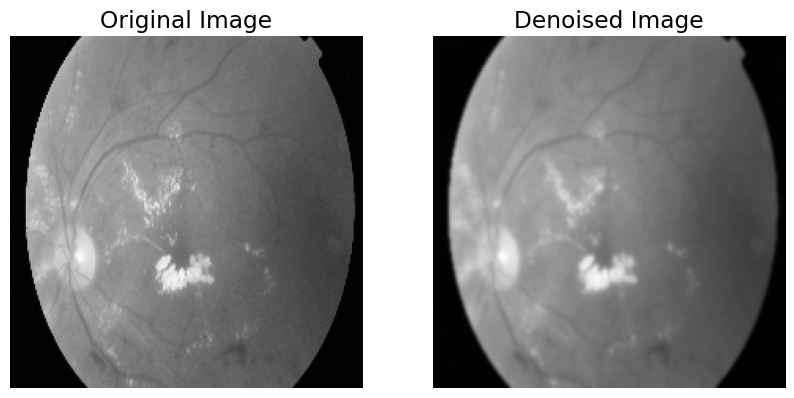

In [ ]:
def denoise_image(image, sigma=1.0):
    return gaussian_filter(image, sigma=sigma)

# Example of how to use the denoising function
image_path = train_paths[0]
grayscale_image = convert_to_grayscale(image_path)

# Denoise the image
denoised_image = denoise_image(grayscale_image, sigma=1.0)

# Display the original and denoised images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()

In [ ]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

print("hello")

hello


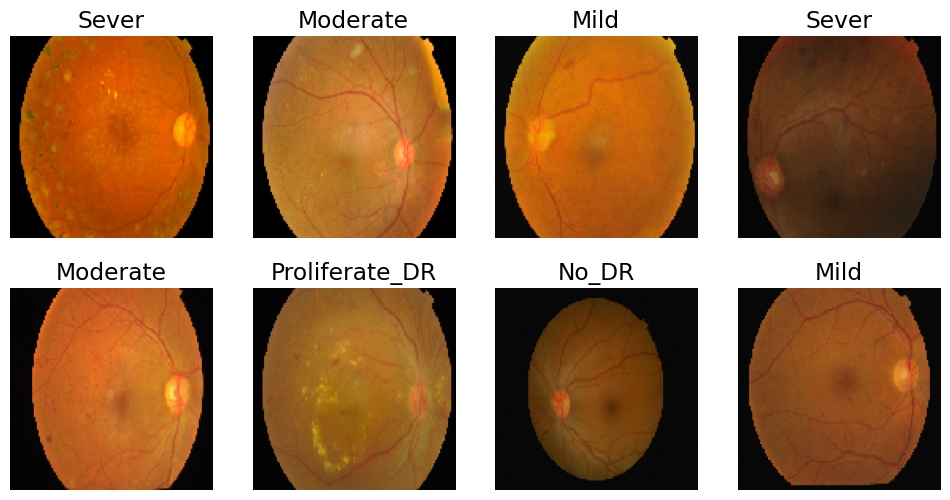

In [ ]:
IMAGE_SIZE = 128

def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()


In [ ]:
unique_labels = os.listdir(train_dir)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense

In [ ]:
base_model = ResNet50V2(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers[:-4]:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(unique_labels), activation='softmax'))

print("hello")

94668760/94668760 [==============================] - 1s 0us/step
hello


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 4, 4, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 27759877 (105.90 MB)
Trainable params: 524

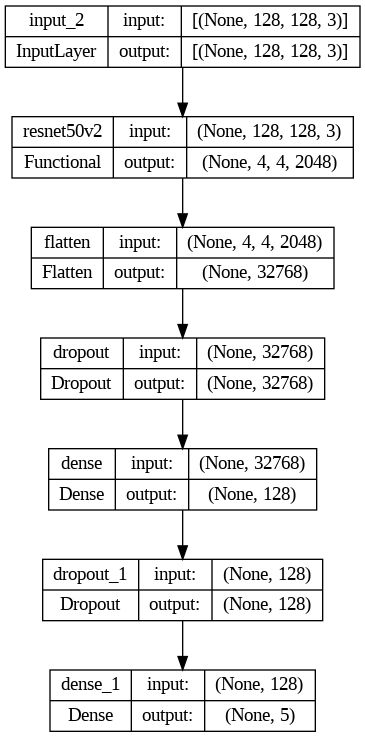

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [ ]:
batch_size = 20
steps = int(len(train_paths)/batch_size)
epochs = 10
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/10
8/8 [==============================] - 41s 5s/step - loss: 2.0176 - sparse_categorical_accuracy: 0.2812
Epoch 2/10
8/8 [==============================] - 13s 1s/step - loss: 0.7319 - sparse_categorical_accuracy: 0.7389
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.3203 - sparse_categorical_accuracy: 0.9236
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.2316 - sparse_categorical_accuracy: 0.9427
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.1251 - sparse_categorical_accuracy: 0.9745
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.0575 - sparse_categorical_accuracy: 0.9809
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.0439 - sparse_categorical_accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 10s 1s/step - loss: 0.0449 - sparse_categorical_accuracy: 0.9873
Epoch 9/10
8/8 [==============================] - 9s 1s/step - loss: 0.0266 - spars

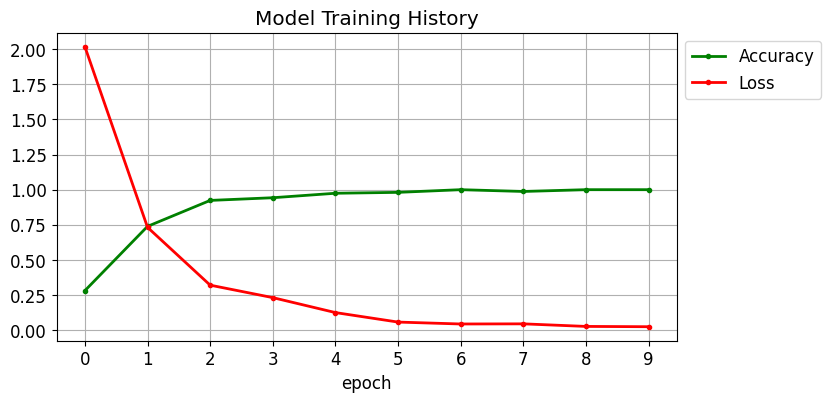

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
unique_labels = ['mild','moderate', 'no_dr','proliferate_dr','sever']  # Include all possible labels

def encode_label(labels):
    encoded = []
    for x in labels:
        x_lower = x.lower()  # Convert label to lowercase
        encoded.append(unique_labels.index(x_lower))
    return np.array(encoded)

In [ ]:
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

  0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


 25%|██▌       | 1/4 [00:04<00:12,  4.15s/it]

1/1 [==============================] - 2s 2s/step


 50%|█████     | 2/4 [00:14<00:15,  7.89s/it]

1/1 [==============================] - 2s 2s/step


 75%|███████▌  | 3/4 [00:25<00:09,  9.12s/it]

1/1 [==============================] - 2s 2s/step


100%|██████████| 4/4 [00:35<00:00,  9.37s/it]

1/1 [==============================] - 2s 2s/step


5it [00:41,  8.36s/it]


5/5 [==============================] - 10s 2s/step


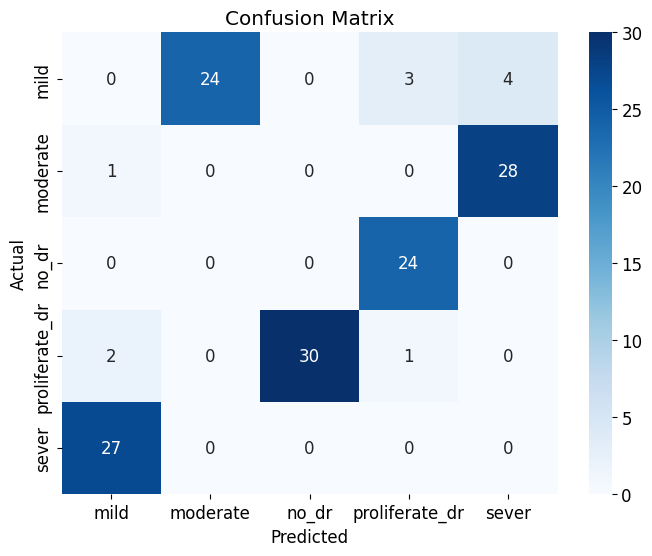

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to decode one-hot encoded labels
def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

# Generate predictions on the test set
test_predictions = model.predict(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1))
test_predictions = np.argmax(test_predictions, axis=-1)

# Decode one-hot encoded labels
y_true = encode_label(test_labels)
y_pred = test_predictions

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        24
           3       0.04      0.03      0.03        33
           4       0.00      0.00      0.00        27

    accuracy                           0.01       144
   macro avg       0.01      0.01      0.01       144
weighted avg       0.01      0.01      0.01       144



1/1 [==============================] - 0s 255ms/step


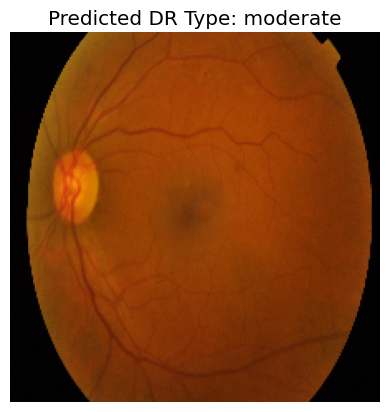

In [40]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the test image
test_image_path = '/content/drive/MyDrive/GecDiaDiseases/Testing/Moderate/00cb6555d108.png'  # Replace this with the actual path

# Load and preprocess the test image
test_img = image.load_img(test_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
test_img_array = image.img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0)
test_img_array = preprocess_input(test_img_array)

# Make predictions
predictions = model.predict(test_img_array)
predicted_class = np.argmax(predictions[0])
predicted_label = decode_label([predicted_class])[0]

# Display the test image
img = mpimg.imread(test_image_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.title("Predicted DR Type: " + predicted_label)
plt.show()